# 30分後のEUR/USDの値段を予測する

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append('../')

from lib import lib

In [3]:
li_currency = ["USDJPY","EURJPY","EURUSD","GBDJPY","CADJPY","CHFJPY","GBDUSD","USDCHF","SEKJPY","NOKJPY",
"EURGBP","USDCAD","TRYJPY","ZARJPY","MXNJPY","TRYUSD","EURTRY","RUBJPY","AUDJPY","NZDJPY",
"AUDUSD","NZDUSD","EURAUD","GBPAUD","AUDCAD","EURNZD","AUDNZD","CNYJPY","HKDJPY","SGDJPY"]

In [4]:
CURRENCY = "EURUSD"
PERIOD = 3 # 予測の間隔
PERIOD2 = 6 # 変化の間隔
PIP = 0.0005

In [5]:
target, day = lib.makeTarget(CURRENCY)
dayweek = list(map(lib.dayweek,day))
dayhour = list(map(lib.dayhour,day))

In [6]:
data = lib.makeData(li_currency).values
diffs = lib.diffData(data,PERIOD2)
data = data[PERIOD2:]
data = np.concatenate([data,diffs],1)[max(PERIOD-PERIOD2,0):]

In [7]:
target = lib.diffTarget(target,PERIOD)[max(PERIOD2-PERIOD,0):]

In [8]:
len(data)

4657

In [9]:
len(target)

4657

In [10]:
size = len(target)
dayweek = dayweek[max(PERIOD2,PERIOD):]
dayhour = dayhour[max(PERIOD2,PERIOD):]

In [11]:
data, target = lib.checkDay(data,target,dayweek,dayhour,size)
data = np.array(data)

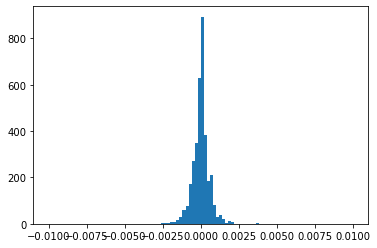

In [18]:
plt.hist(target, range=(-0.01, 0.01), bins=100);

In [13]:
target2 = [lib.highlow(i,PIP) for i in target]
target3 = [lib.highlow2(i,PIP) for i in target]
target4 = [lib.highlow3(i,PIP) for i in target]

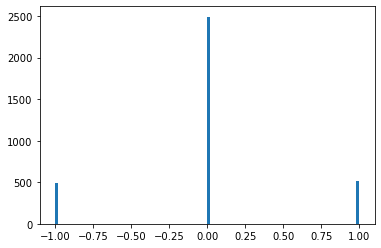

In [19]:
plt.hist(target2, range=(-1, 1), bins=100);

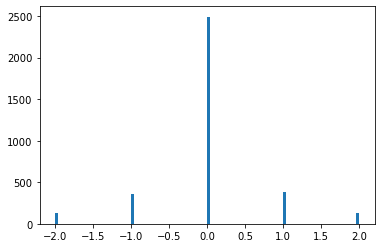

In [16]:
plt.hist(target3, range=(-2, 2), bins=100);

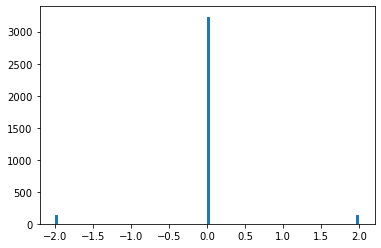

In [17]:
plt.hist(target4, range=(-2, 2), bins=100);

# データ成型は終了

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm

In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

## 多層パーセプトロンで予測を行う

In [22]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.68
[[ 14  35   5]
 [ 20 210  16]
 [  3  33  14]]


In [23]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.6942857142857143
[[  1   1   5   1   0]
 [  2   8  35   1   0]
 [  1   6 226  12   1]
 [  0   3  33   6   0]
 [  0   0   4   2   2]]


In [24]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=300, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.9466666666666667
[[  1   6   0]
 [  1 283   3]
 [  0   6   0]]


0.0011274508331192475
[[ 1.        -0.0785846]
 [-0.0785846  1.       ]]


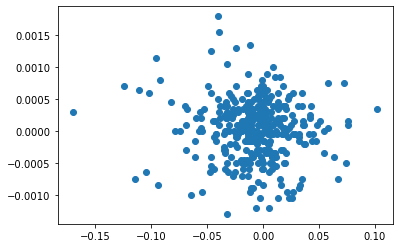

In [25]:
clf = MLPRegressor(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

0.0016981693337734475
[[1.         0.19794209]
 [0.19794209 1.        ]]


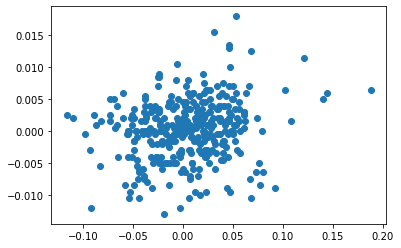

In [27]:
clf = MLPRegressor(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

5.499414996282567e-07
[[1.         0.48533784]
 [0.48533784 1.        ]]


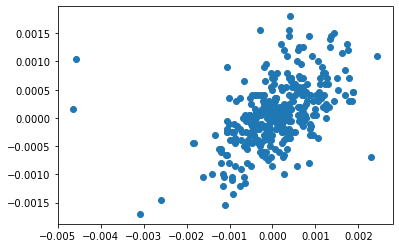

In [28]:
clf = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

## サポートベクターマシンで予測を行う

In [29]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.6
[[ 26  24   4]
 [ 39 164  43]
 [  7  23  20]]


C:\Users\Takumi Inui\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [30]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.5171428571428571
[[  0   5   3   0   0]
 [  0  18  23   5   0]
 [  4  46 152  31  13]
 [  0   9  19  11   3]
 [  0   1   5   2   0]]


C:\Users\Takumi Inui\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.9028571428571428
[[  1   7   0]
 [  4 314  16]
 [  0   7   1]]


## ランダムフォレストで予測を行う

In [32]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.7028571428571428
[[  0  54   0]
 [  0 246   0]
 [  0  50   0]]


In [33]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.7028571428571428
[[  0   0   8   0   0]
 [  0   0  46   0   0]
 [  0   0 246   0   0]
 [  0   0  42   0   0]
 [  0   0   8   0   0]]


In [34]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.9542857142857143
[[  0   8   0]
 [  0 334   0]
 [  0   8   0]]


2.341233729767507e-07
[[1.         0.51958334]
 [0.51958334 1.        ]]


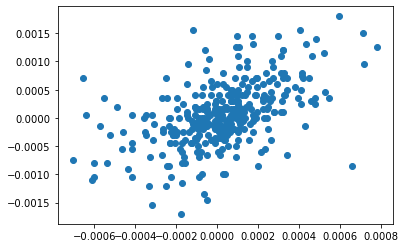

In [35]:
clf = RandomForestRegressor(n_estimators=9, max_depth=9, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

2.3516396133473764e-05
[[1.         0.51092462]
 [0.51092462 1.        ]]


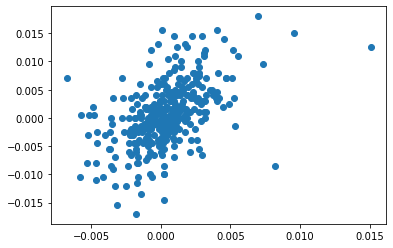

In [36]:
clf = RandomForestRegressor(n_estimators=9, max_depth=9, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

## Adaboostで予測を行う

In [37]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.6971428571428572
[[ 18  35   1]
 [ 19 209  18]
 [  0  33  17]]


In [38]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.6771428571428572
[[  1   0   7   0   0]
 [  3   2  39   2   0]
 [  0   0 225  12   9]
 [  0   0  31   7   4]
 [  0   0   2   4   2]]


In [39]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.8685714285714285
[[  1   7   0]
 [  2 298  34]
 [  0   3   5]]


1.877433412286166e-05
[[1.         0.64496187]
 [0.64496187 1.        ]]


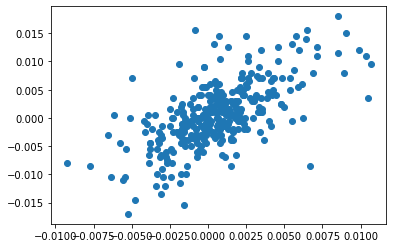

In [40]:
clf = GradientBoostingRegressor(random_state=1, n_estimators=100, max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)